In [543]:
import pandas as pd 
import numpy as np


In [544]:
df=pd.read_csv(r".\vijay_cleaned.csv").iloc[:,1:]
df

,marketingStatusSimplifiedCd,hasImage,statusText,beds,baths,area,sgapt,has3DModel,hasAdditionalAttributions,latitude,longitude,city,state,homeType,rentZestimate,price
0,Non Owner Occupied,True,Sold,3.0,2.0,1224.0,Unknown Listed By,False,True,42.293304,-71.133570,Roslindale,MA,SINGLE_FAMILY,3999.0,819500.0
1,RecentChange,True,Sold,1.0,1.0,723.0,Unknown Listed By,False,True,42.344826,-71.074990,Boston,MA,CONDO,3634.0,880000.0
2,RecentChange,True,Sold,6.0,3.0,3396.0,Unknown Listed By,False,True,42.315850,-71.061130,Dorchester,MA,MULTI_FAMILY,6000.0,1250000.0
3,RecentChange,True,Sold,4.0,3.0,2400.0,Unknown Listed By,False,True,42.298183,-71.078870,Dorchester,MA,MULTI_FAMILY,4964.0,805000.0
4,RecentChange,True,Sold,9.0,3.0,4107.0,RecentChange,False,True,42.300050,-71.083694,Dorchester,MA,MULTI_FAMILY,8970.0,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,RecentChange,True,Sold,5.0,4.0,2366.0,Unknown Listed By,False,True,38.963560,-77.016990,Washington,DC,SINGLE_FAMILY,4999.0,1125000.0
6202,RecentChange,True,Sold,3.0,3.0,1802.0,Unknown Listed By,False,True,38.952750,-77.009360,Washington,DC,TOWNHOUSE,3449.0,465000.0
6203,RecentChange,True,Sold,4.0,4.0,2875.0,RecentChange,False,True,38.928920,-76.992680,Washington,DC,SINGLE_FAMILY,4749.0,1020000.0
6204,Non Owner Occupied,False,Sold,4.0,2.5,1260.0,Unknown Listed By,False,False,38.894318,-76.981830,Washington,DC,SINGLE_FAMILY,3994.0,550000.0


- First we have to decrease number of categories in cities as there are too many unique cities
- All the cities that contribute less than 1% of total number of rows have been labeled as Others

In [545]:
n_cities=df["city"].nunique()
print(f"There are {n_cities} unique cities!")

There are 142 unique cities!


In [546]:
les_propor_cities=df["city"].value_counts()[(((df["city"].value_counts()/df["city"].shape[0])*100)<1)].index
df["city"]=df["city"].apply(lambda x:x if x not in les_propor_cities else "Others")
df["city"].value_counts()

city
Others           1077
Denver            486
Indianapolis      485
San Jose          471
Philadelphia      469
Charlotte         458
Phoenix           402
San Diego         368
Washington        358
Seattle           347
San Francisco     346
Nashville         324
Chicago           264
Los Angeles       183
Tampa              88
Boston             80
Name: count, dtype: int64

Clubbed the Pre-Foreclosure - RecentChange and Pre-Foreclosure categories from marketingStatusSimplifiedCd feature as both of them are very low in number                      

In [547]:
df["marketingStatusSimplifiedCd"].value_counts()

marketingStatusSimplifiedCd
RecentChange                      4933
Non Owner Occupied                1267
Pre-Foreclosure - RecentChange       5
Pre-Foreclosure                      1
Name: count, dtype: int64

In [548]:
x=df['marketingStatusSimplifiedCd'].value_counts()[df['marketingStatusSimplifiedCd'].value_counts()<100]
y=x.index
df["marketingStatusSimplifiedCd"]=df["marketingStatusSimplifiedCd"].apply(lambda x:x if x not in y else "Pre-Foreclosure")
df["marketingStatusSimplifiedCd"].value_counts()

marketingStatusSimplifiedCd
RecentChange          4933
Non Owner Occupied    1267
Pre-Foreclosure          6
Name: count, dtype: int64

Dropped latitude and longitude as they did not prove useful at all in EDA

In [549]:
df.drop(columns=['latitude','longitude'],axis=1,inplace=True)
print(df.shape)
df.columns

(6206, 14)


Index(['marketingStatusSimplifiedCd', 'hasImage', 'statusText', 'beds',
       'baths', 'area', 'sgapt', 'has3DModel', 'hasAdditionalAttributions',
       'city', 'state', 'homeType', 'rentZestimate', 'price'],
      dtype='object')

Imputation->Outlier Removal->Encoding->Scaling

# Null Value Imputation

In [550]:
df.isnull().sum()

marketingStatusSimplifiedCd      0
hasImage                         0
statusText                       0
beds                           186
baths                          134
area                           201
sgapt                            0
has3DModel                       0
hasAdditionalAttributions        0
city                             0
state                            0
homeType                         0
rentZestimate                   62
price                            0
dtype: int64

Imputing beds and baths with mode as it is discrete data type

In [551]:
for column in df.columns:
    if column=='beds'or column=='baths': 
        df[column].fillna(df[column].mode()[0], inplace=True)

df[["beds","baths"]]

,beds,baths
0,3.0,2.0
1,1.0,1.0
2,6.0,3.0
3,4.0,3.0
4,9.0,3.0
...,...,...
6201,5.0,4.0
6202,3.0,3.0
6203,4.0,4.0
6204,4.0,2.5


Area and restZestimate we are imputing using linear interpolation

In [552]:
numeric_columns = ['area','rentZestimate']  

for column in numeric_columns:
    df[column].interpolate(method='linear', inplace=True)

In [553]:
df.isnull().sum()

marketingStatusSimplifiedCd    0
hasImage                       0
statusText                     0
beds                           0
baths                          0
area                           0
sgapt                          0
has3DModel                     0
hasAdditionalAttributions      0
city                           0
state                          0
homeType                       0
rentZestimate                  0
price                          0
dtype: int64

##### Almost all our numerical features and price target variable are right skewed.
##### Using log transform to make them more normal and reduce skewness
- Some ML algorithms work better with normally distributed target variable
- It is neccessary to do log transform for right skewed data if we want to apply outlier removal

In [554]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
old_skew = df[['beds', 'baths', 'area', 'rentZestimate', 'price']].skew().sort_values(ascending=False)
old_skew

price            39.419826
area             26.216257
rentZestimate    10.292758
beds              5.144082
baths             5.097370
dtype: float64

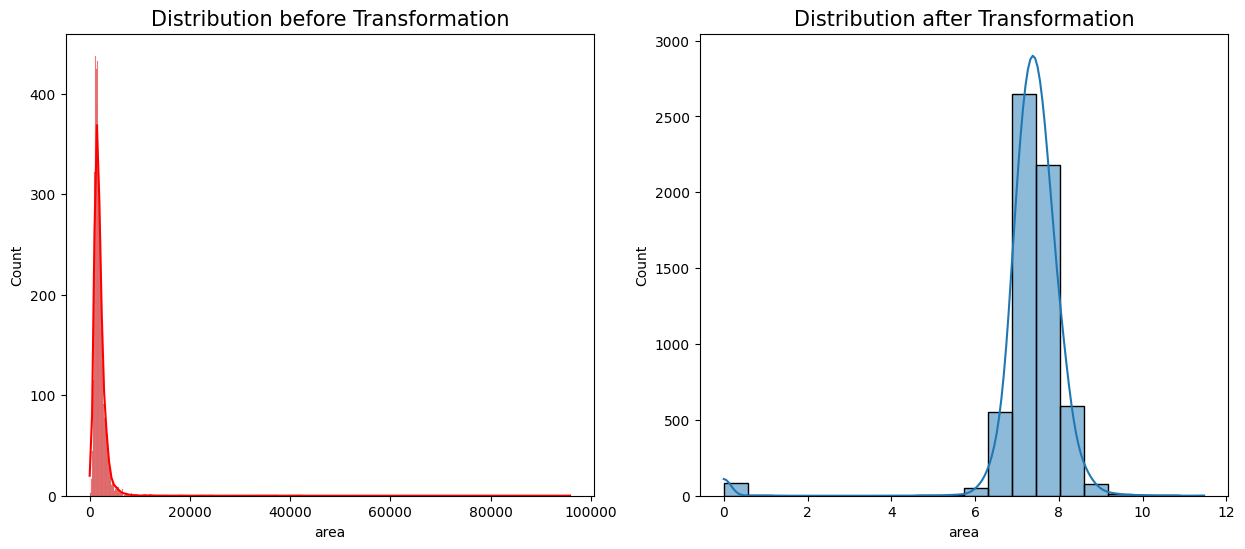

Skewness was 26.22 before & is -5.42 after Log transformation.


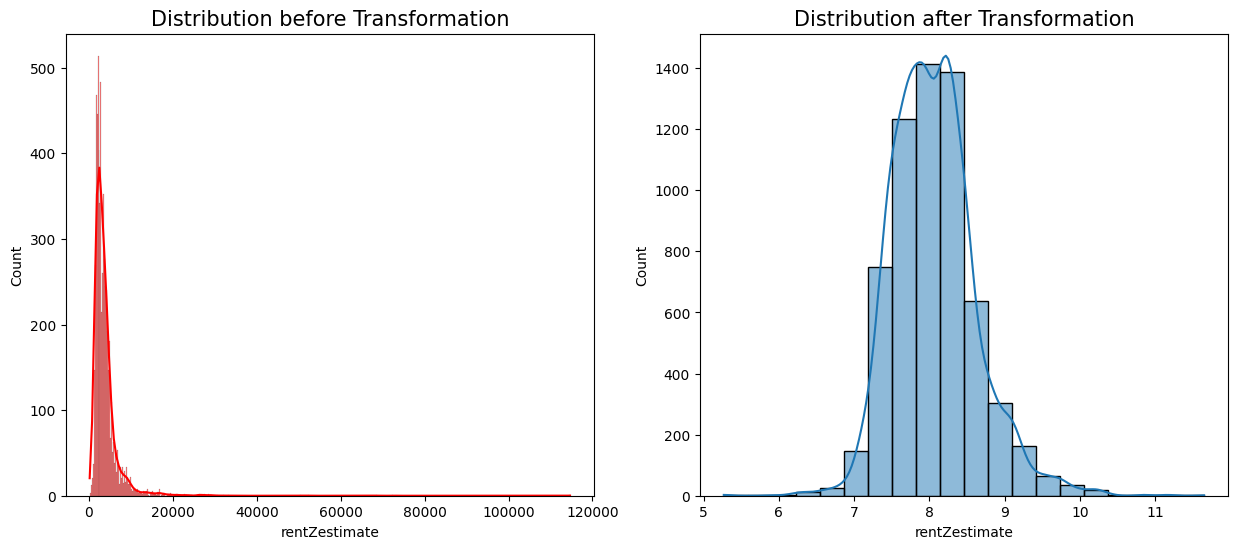

Skewness was 10.29 before & is 0.66 after Log transformation.


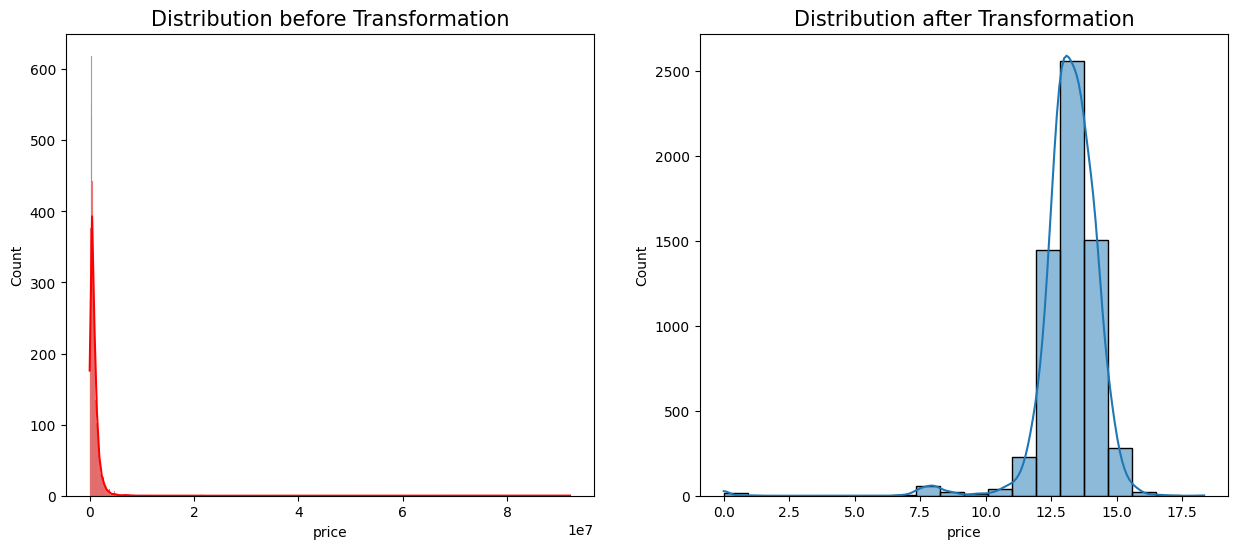

Skewness was 39.42 before & is -4.22 after Log transformation.


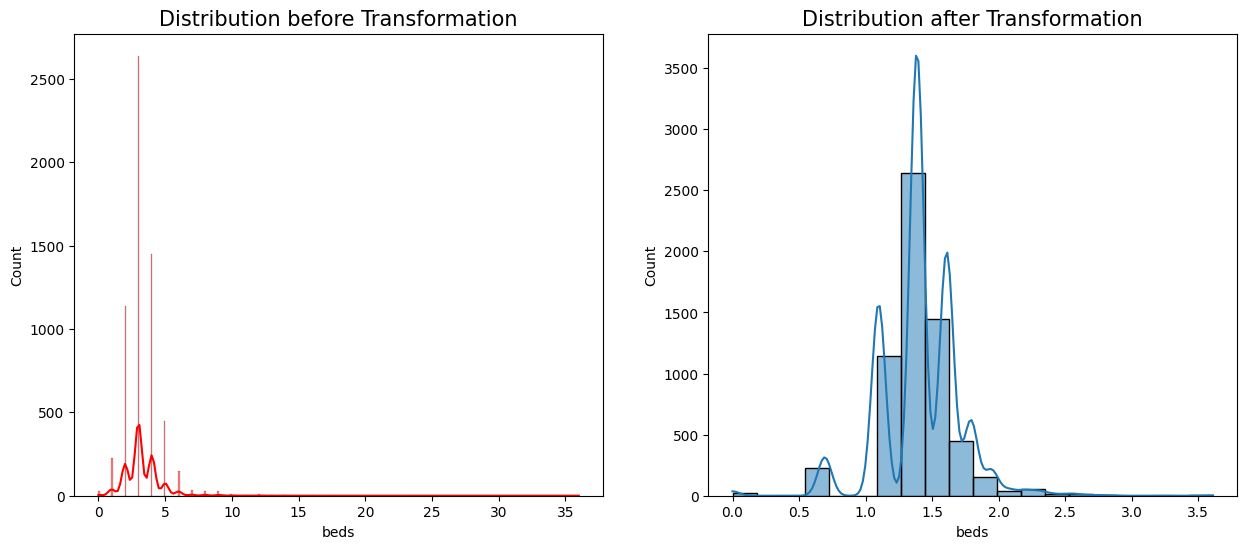

Skewness was 5.14 before & is -0.13 after Log transformation.


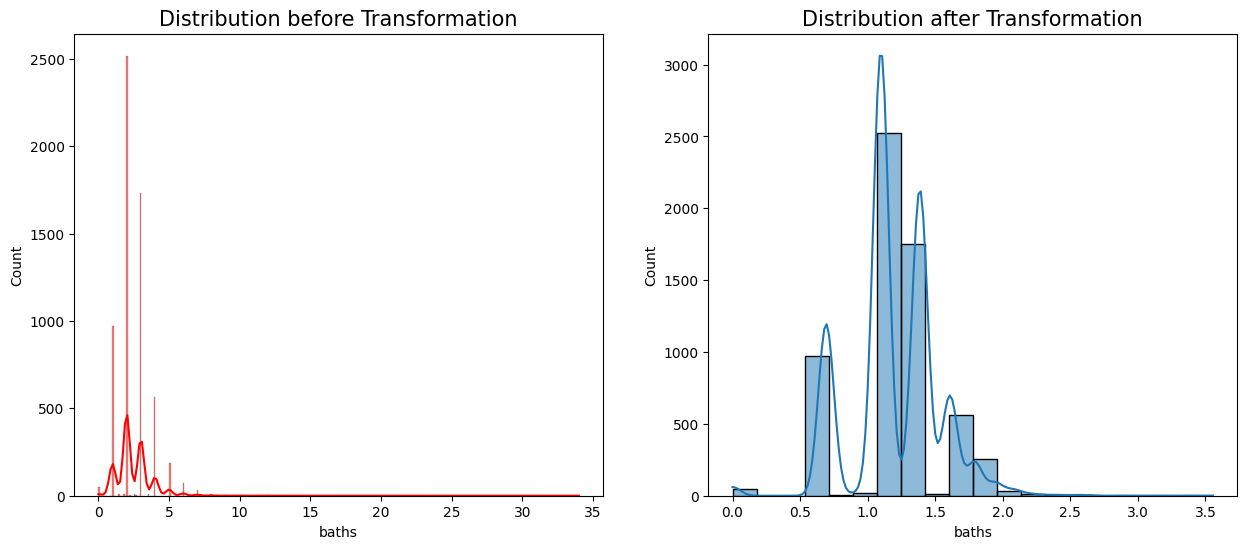

Skewness was 5.1 before & is 0.03 after Log transformation.


In [555]:
def logTrans(feature):   
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df[feature] = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df[feature],bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df[feature].skew(),2)} after Log transformation.")
cols=['area','rentZestimate','price',"beds","baths"]
for x in cols:
    logTrans(feature=x)

In [556]:
df['price'].head()
df['area'].head()
df['rentZestimate'].head()

0    8.294050
1    8.198364
2    8.699681
3    8.510169
4    9.101752
Name: rentZestimate, dtype: float64

# Outlier Removal

For area, rentZestimate, price 

Performed z-score imputation, removed rows that less than mean- 3*std or more than mean+ 3 * std

In [557]:
numerical_columns =['area','rentZestimate','price','beds',"baths"]

def remove_outliers(df, threshold=3):
    z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

df = remove_outliers(df)

print("Original DataFrame shape:", df.shape)

df

Original DataFrame shape: (5855, 14)


,marketingStatusSimplifiedCd,hasImage,statusText,beds,baths,area,sgapt,has3DModel,hasAdditionalAttributions,city,state,homeType,rentZestimate,price
0,Non Owner Occupied,True,Sold,1.386294,1.098612,7.110696,Unknown Listed By,False,True,Others,MA,SINGLE_FAMILY,8.294050,13.616451
1,RecentChange,True,Sold,0.693147,0.693147,6.584791,Unknown Listed By,False,True,Boston,MA,CONDO,8.198364,13.687678
2,RecentChange,True,Sold,1.945910,1.386294,8.130648,Unknown Listed By,False,True,Others,MA,MULTI_FAMILY,8.699681,14.038655
3,RecentChange,True,Sold,1.609438,1.386294,7.783641,Unknown Listed By,False,True,Others,MA,MULTI_FAMILY,8.510169,13.598599
4,RecentChange,True,Sold,2.302585,1.386294,8.320692,RecentChange,False,True,Others,MA,MULTI_FAMILY,9.101752,13.384729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,RecentChange,True,Sold,1.791759,1.609438,7.769379,Unknown Listed By,False,True,Washington,DC,SINGLE_FAMILY,8.517193,13.933294
6202,RecentChange,True,Sold,1.386294,1.386294,7.497207,Unknown Listed By,False,True,Washington,DC,TOWNHOUSE,8.146130,13.049795
6203,RecentChange,True,Sold,1.609438,1.609438,7.964156,RecentChange,False,True,Washington,DC,SINGLE_FAMILY,8.465900,13.835314
6204,Non Owner Occupied,False,Sold,1.609438,1.252763,7.139660,Unknown Listed By,False,False,Washington,DC,SINGLE_FAMILY,8.292799,13.217675


# Encoding

Using One Hot Encoding for categorical features

In [567]:
import pandas as pd

categorical_cols = ['marketingStatusSimplifiedCd', 'hasImage','statusText', 'sgapt', 'has3DModel', 'hasAdditionalAttributions', 'city', 'state', 'homeType']

one_hot_encoded = pd.get_dummies(df[categorical_cols],drop_first=True)

df_encoded = pd.concat([one_hot_encoded, df[['beds', 'baths', 'area', 'rentZestimate', 'price']]], axis=1)

df_encoded

,hasImage,has3DModel,hasAdditionalAttributions,marketingStatusSimplifiedCd_Pre-Foreclosure,marketingStatusSimplifiedCd_RecentChange,statusText_Sold,sgapt_Unknown Listed By,city_Charlotte,city_Chicago,city_Denver,...,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,beds,baths,area,rentZestimate,price
0,True,False,True,False,False,True,True,False,False,False,...,False,False,False,True,False,1.386294,1.098612,7.110696,8.294050,13.616451
1,True,False,True,False,True,True,True,False,False,False,...,False,False,False,False,False,0.693147,0.693147,6.584791,8.198364,13.687678
2,True,False,True,False,True,True,True,False,False,False,...,False,False,True,False,False,1.945910,1.386294,8.130648,8.699681,14.038655
3,True,False,True,False,True,True,True,False,False,False,...,False,False,True,False,False,1.609438,1.386294,7.783641,8.510169,13.598599
4,True,False,True,False,True,True,False,False,False,False,...,False,False,True,False,False,2.302585,1.386294,8.320692,9.101752,13.384729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,True,False,True,False,True,True,True,False,False,False,...,False,False,False,True,False,1.791759,1.609438,7.769379,8.517193,13.933294
6202,True,False,True,False,True,True,True,False,False,False,...,False,False,False,False,True,1.386294,1.386294,7.497207,8.146130,13.049795
6203,True,False,True,False,True,True,False,False,False,False,...,False,False,False,True,False,1.609438,1.609438,7.964156,8.465900,13.835314
6204,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,1.609438,1.252763,7.139660,8.292799,13.217675


In [568]:
bool_cols=df_encoded.dtypes[df_encoded.dtypes=="bool"].index
for col in bool_cols:
    df_encoded[col]=df_encoded[col].astype(float)
df_encoded

,hasImage,has3DModel,hasAdditionalAttributions,marketingStatusSimplifiedCd_Pre-Foreclosure,marketingStatusSimplifiedCd_RecentChange,statusText_Sold,sgapt_Unknown Listed By,city_Charlotte,city_Chicago,city_Denver,...,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,beds,baths,area,rentZestimate,price
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.386294,1.098612,7.110696,8.294050,13.616451
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,6.584791,8.198364,13.687678
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.945910,1.386294,8.130648,8.699681,14.038655
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.609438,1.386294,7.783641,8.510169,13.598599
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.302585,1.386294,8.320692,9.101752,13.384729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.791759,1.609438,7.769379,8.517193,13.933294
6202,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.386294,1.386294,7.497207,8.146130,13.049795
6203,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.609438,1.609438,7.964156,8.465900,13.835314
6204,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.609438,1.252763,7.139660,8.292799,13.217675


# Used min-max scaling for all features

In [569]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=df_encoded.drop(columns=["price"])
y=df_encoded["price"]
scaled_x=scaler.fit_transform(X)
scaled_x

array([[1.        , 0.        , 1.        , ..., 0.29248125, 0.45412527,
        0.57085036],
       [1.        , 0.        , 1.        , ..., 0.        , 0.35762533,
        0.54223533],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.64127948,
        0.69215607],
       ...,
       [1.        , 0.        , 1.        , ..., 0.66096405, 0.61072929,
        0.62224283],
       [0.        , 0.        , 0.        , ..., 0.40367746, 0.45944   ,
        0.57047631],
       [1.        , 0.        , 1.        , ..., 0.29248125, 0.46002114,
        0.47979172]])

In [570]:
y

0       13.616451
1       13.687678
2       14.038655
3       13.598599
4       13.384729
          ...    
6201    13.933294
6202    13.049795
6203    13.835314
6204    13.217675
6205    12.821261
Name: price, Length: 5855, dtype: float64